# Relatório VII

## Criando argumentos


In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('arquivos/dados_residenciais_limpos.csv', sep=';')

In [3]:
#dados.pop('Unnamed: 0') #Removendo Index indesejado. #Eu tinha importado arquivo errado. 

In [4]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor bruto,Valor m2,Tipo agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,Apartamento


In [5]:
dados['Valor'].mean() #média da coluna valor: 5046.172821405663

5046.172821405663

### Queremos saber o valor médio de alguns bairros específicos. 

In [6]:
#Separar os bairros(Barra da tijuca, Copacabana, Ipanema, Leblon, Botafogo, Flamengo, Tijuca)
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']

selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [7]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [8]:
grupo_bairro = dados.groupby('Bairro')

In [9]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [10]:
# for bairro, data in grupo_bairro: 
#     print('{} -> {}'.format(bairro, dados['Valor'].mean()))

In [11]:
grupo_bairro['Valor'].mean().round(2)

Bairro
Barra da Tijuca    7069.55
Botafogo           8791.83
Copacabana         4126.68
Flamengo           4113.53
Ipanema            9352.00
Leblon             8746.34
Tijuca             2043.52
Name: Valor, dtype: float64

## Estatística discritivas 

In [12]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [13]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'}).round(2)

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,800.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


In [14]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Valor médio do Aluguel por bairro')

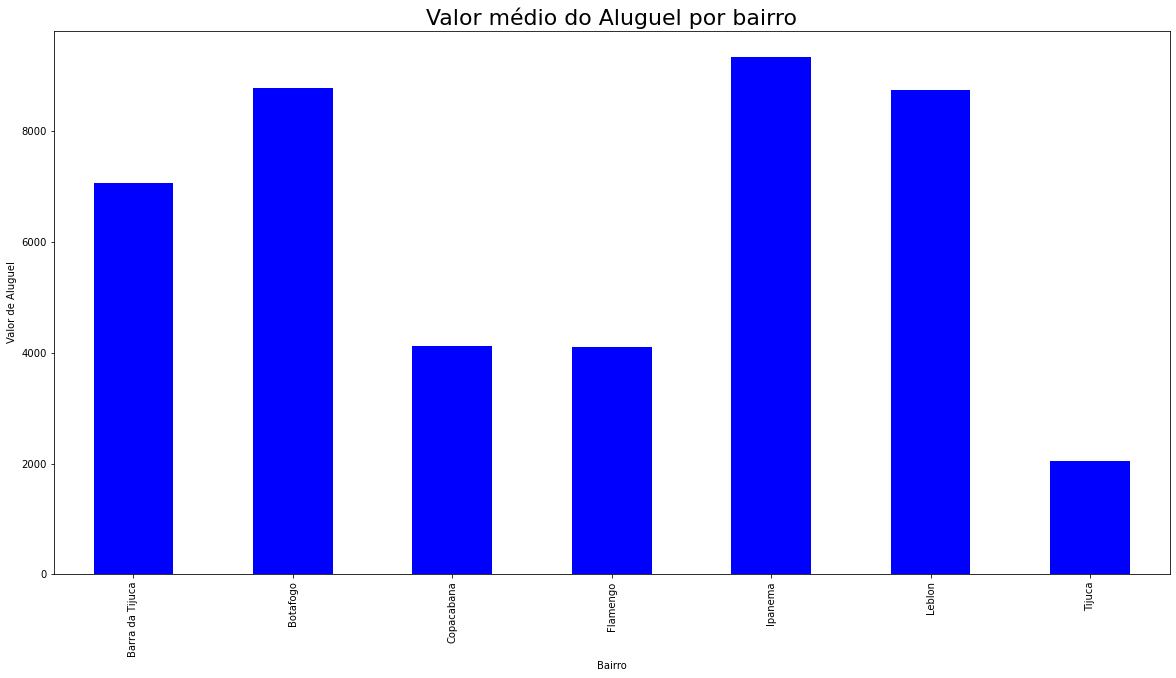

In [15]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor de Aluguel')
fig.set_title('Valor médio do Aluguel por bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor minimo do Aluguel por bairro')

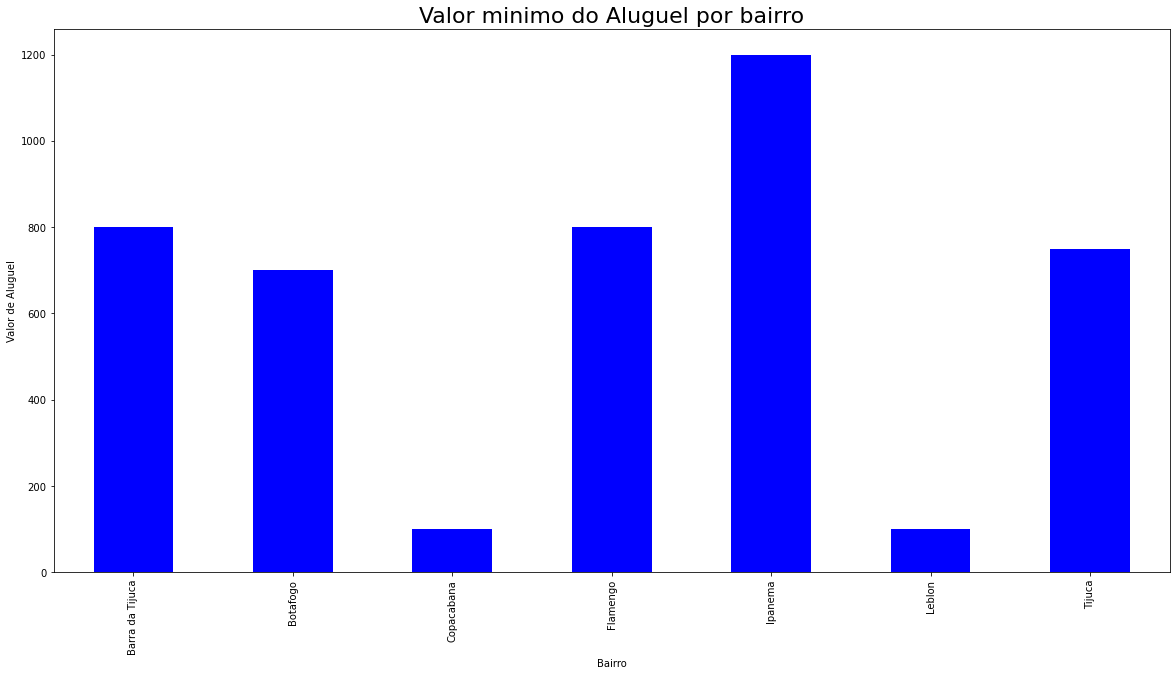

In [16]:
fig = grupo_bairro['Valor'].min().plot.bar(color = 'blue')
fig.set_ylabel('Valor de Aluguel')
fig.set_title('Valor minimo do Aluguel por bairro', {'fontsize': 22})